#### 퍼셉트론(perceptron)은 가장 오래되고 단순한 형태의 판별함수기반 분류모형 중 하나이다.

[그림] 퍼셉트론 : https://datascienceschool.net/upfiles/102ba905e4f945deaaac794364123877.png

퍼셉트론은 입력  𝑥=(1,𝑥1,⋯,𝑥𝑚) 에 대해 1 또는 -1의 값을 가지는  𝑦 를 출력하는 비선형 함수이다. 

#### 1을 포함하는 입력 요소  𝑥𝑖 에 대해 가중치  𝑤𝑖 를 곱한 값  𝑎=𝑤𝑇𝑥 을 활성화값(activations)이라고 하며 이 값이 판별함수의 역할을 한다.

$$a = w^T x$$

판별함수 값이 활성화 함수(activation function)  ℎ(𝑎) 를 지나면 분류 결과를 나타내는 출력  𝑦̂  가 생성된다.

$$\hat{y} = h(w^Tx)$$

퍼셉트론의 활성화 함수는 부호함수(sign function) 또는 단위계단함수(Heaviside step function)라고 부르는 함수이다.

$$h(a) = \begin{cases} -1, & a < 0, \\ 1, & a \ge 0 \end{cases}$$

## 퍼셉트론 손실함수

다음과 같이  𝑁 개의 학습용 데이터가 있다고 하자.

$$(x_1, y_1), (x_2, y_2), \ldots, (x_i, y_i), \ldots, (x_N, y_N)$$

퍼셉트론은 독립변수  𝑥 로부터 종속변수  𝑦 를 예측하는 예측모형이므로 모든 학습 데이터에 대해 예측 오차를 최소화하는 가중치  𝑤 를 계산해야 한다. 

가중치  𝑤 에 따라 달라지는 전체 예측 오차  𝐿 는  𝑖 번째 개별 데이터에 대한 손실함수  𝐿𝑖(𝑦̂ 𝑖,𝑦𝑖) 의 합으로 표현할 수 있다.

$$L = \sum_{i=1}^N L_i(y_i, \hat{y}_i)$$

손실  𝐿𝑖(𝑦𝑖,𝑦̂ 𝑖) 는 실제값  𝑦 와 예측값  𝑦̂  의 차이를 나타내는 함수이다. 회귀 분석에서는  𝐿(𝑦̂ ,𝑦)=−(𝑦−𝑦̂ )2 과 같은 손실함수를 많이 사용하였지만 

#### 퍼셉트론의 경우에는 다음과 같은 손실 함수를 사용한다. 이를 제로-원 손실함수(zero-one loss function)이라고 한다.

$$L_i(y_i, \hat{y}_i) = \max(0, -y_i\hat{y}_i)$$

#### 제로-원 손실함수  𝐿𝑖 은  𝑦̂  과  𝑦 가 같으면 0이고 다르면 1이다. 다음과 같이 서술할 수도 있다.

$$L_i(\hat{y}) =
\begin{cases}
\frac{1}{2}(\text{sgn}(-\hat{y}) + 1) & \text{ if } y = 1 \\
\frac{1}{2}(\text{sgn}(\hat{y}) + 1)& \text{ if } y = -1 \\
\end{cases}$$

전체 손실함수는

$$L = \sum_{i=1}^N \max(0, -y_i\hat{y}_i) = - \sum_{i \in M}  y_i\hat{y}_i$$

가 된다. 이 식에서  𝑀 은 오분류(misclassification)된 데이터의 집합이다.  𝑦 와  𝑦̂  값이 다르면 오분류된 것이다.

\begin{aligned} 
\hat{y} =    y & \rightarrow & \text{right classficiation} \\ 
\hat{y} \neq y & \rightarrow & \text{misclassification}
\end{aligned}

#### 그런데 제로-원 손실함수를 쓰면  𝑦̂ (𝑥) 가  𝑥 에 대한 계단형 함수이므로 대부분의 영역에서 기울기가 0이 되어 미분값으로부터 최소점의 위치를 구할 수 없다. 따라서 퍼셉트론에서는  𝑦̂  대신 활성화값  𝑤𝑇𝑥 를 손실함수로 사용한다.

$$L_P(w) = - \sum_{i \in M} y_i \cdot w^Tx_i$$

이를 퍼셉트론 손실함수(perceptron loss function) 또는 0-힌지 손실함수(zero-hinge loss function)라고 한다. 

#### 여기에서 손실값은 오분류된 표본에 대해서만 계산한다는 점에 주의하라. 이 때는  𝑦 와  sgn(𝑦̂ ) 값이 다르면 오분류된 것이다.

\begin{aligned} 
\text{sgn}\hat{y} =    y & \rightarrow & \text{right classficiation} \\ 
\text{sgn}\hat{y} \neq y & \rightarrow & \text{misclassification}
\end{aligned}

퍼셉트론 손실함수는 다음처럼 표기할 수도 있다.

$$L_{P,i}(\hat{y}) =
\begin{cases}
-\frac{1}{2}w^Tx\,(\text{sgn}(-\hat{y}) + 1) & \text{ if } y = 1 \\
\frac{1}{2}w^Tx\,(\text{sgn}(\hat{y}) + 1)& \text{ if } y = -1 \\
\end{cases}$$

## 가중치 계산

퍼셉트론 손실함수  𝐿𝑃(𝑤) 를 최소화하는  𝑤 를 찾기 위해  𝐿𝑃(𝑤) 를  𝑤 로 미분하여 그레디언트를 구하면 다음과 같다.

$$\dfrac{dL_P}{dw} = - \sum_{i \in M} x_i y_i$$

그레디언트 디센트(gradient descent) 방법을 사용하면 다음과 같이  𝑤 를 갱신할 수 있다.

\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray}

여기에서  𝜂 는 스텝사이즈(step size) 또는 학습속도(learning rate)라고 한다.

실제로는 계산량을 줄이기 위해 전체 오분류 데이터 집합  𝑀  중에서 하나만 골라서 사용한다. 다음 식에서  𝑚 은 오분류된 데이터 중의 하나를 무작위로 고른 것이다. ( 𝑚∈𝑀 )

$$w_{k+1} = w_{k} + \eta_k  x_m y_m$$

또  𝑦̂  이  1 또는  −1 의 값만 가질 수 있으므로 실제로는 다음과 같은 식이 된다.

$$w_{k+1} =
\begin{cases} 
w_{k} + \eta_k x_m  & \text{ if } \hat{y}_m = 1 \neq y_m \\ 
w_{k} - \eta_k x_m, & \text{ if } \hat{y}_m = -1 \neq y_m \\ 
\end{cases}$$

그런데 퍼셉트론 손실함수는 원래의 손실함수와 정확하게 같지 않기 때문에 이러한 방식으로 학습을 했을 때 매 단계마다 반드시 원래의 손실함수가 감소한다는 보장은 없다. 다만 퍼셉트론 수렴 정리(perceptron convergence theorem)로부터 데이터가 선형분리(linearly separable)가능한 경우에는 완전분류모형으로 수렴한다는 것이 증명되어 있다.

## Scikit-Learn 의 퍼셉트론 구현

Scikit-Learn에서 제공하는 퍼셉트론 모형인 Perceptron 클래스는 다음과 같은 입력 인수를 가진다.

+ max_iter: 최적화를 위한 반복 횟수(iteration number)
+ eta0: 학습속도  𝜂 
+ n_iter_no_change: 이 설정값만큼 반복을 해도 성능이 나아지지 않으면 max_iter 설정값과 상관없이 멈춘다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]  # 꽃받침 속성만 사용
y = (iris.target[idx] / 2).astype(int)  # 0, 1로 변환

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
def plot_perceptron(n):
    model = Perceptron(max_iter=n, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    # tol : The stopping criterion. loss > previous_loss - tol일때 반복을 멈춘다.
    XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolors='k')
    plt.xlabel("꽃받침 길이")
    plt.ylabel("꽃받침 폭")
    plt.title("붓꽃 데이터(setosa / virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

In [5]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

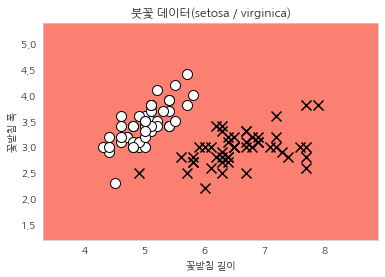

In [6]:
plot_perceptron(1)

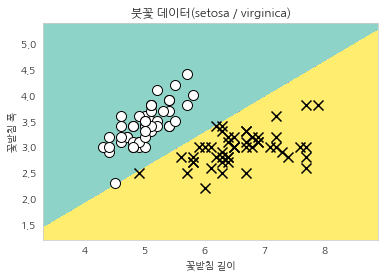

In [7]:
plot_perceptron(300)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

In [9]:
print(classification_report(y, model.predict(X), target_names=[iris.target_names[0], iris.target_names[2]]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 학습 성능

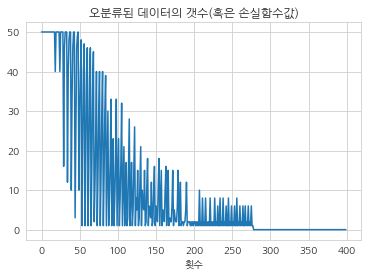

In [10]:
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
# warm_start가 True이면, 초기화로 fit 방법으로 이전 솔루션을 재사용한다. 단 이전 결과는 삭제한다.

for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))  # 분류가 잘못 되었을 경우에만 손실값을 더한다.
    
plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수(혹은 손실함수값)")
plt.show()

280 번 정도에서 오분류 데이터 갯수가 0에 도달한다.

## SGD

SGD(Stochastic Gradient Descent) 방법은 손실함수 자체가 아니라 
#### 손실함수의 기댓값을 최소하는 방법이다.

$$\arg \min \text{E}[L]$$

전체 손실함수  𝐿 는 개별 데이터의 손실함수  𝐿𝑖(𝑦̂ 𝑖,𝑦𝑖) 의 합이다.

$$E = \sum_{i} L_i(\hat{y}_i, y_i)$$

SGD 최적화 방법은 그레디언트가 아니라 그레디언트의 기댓값의 추정치를 이용한다.

\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \text{E}[\nabla L] \\
\end{eqnarray}

그레디언트의 기댓값의 추정치는 표본 평균이다. 

#### 즉 모든 학습용 데이터를 다 사용하여 그레디언트를 구하는 것이 아니라 미니배치(minibatch)라고 부르는 일부의 데이터만 사용하여 그레디언트 추정치를 구한다. 

#### 따라서 한번의 계산량이 많거나 학습데이터가 많은 딥러닝(deep learning)에 사용된다. 퍼셉트론은 오분류된(mis-classified) 데이터만 이용하는 SGD의 일종이다.

SGD 방법이 기댓값이 최소화되도록 수렴한다는 것은 다양한 논문에서 증명이 되어 있다. 다만 손실함수 자체를 최적화하는 것이 아니라 손실함수의 기댓값의 추정치를 최대화하기 때문에 손실함수값이 전반적으로 감소하는 추세를 보이는 것 뿐이고 항상 절대적으로 감소한다는 보장은 없다.

SGD에서는 제로-원이나 퍼셉트론 손실함수 이외에도 손실함수가 볼록함수(convex function)이면 모두 개별 데이터 손실함수로 사용할 수 있다. 다음 그림에서는  𝑦=1 인 경우 많이 사용되는 손실함수의 값을 나타내었다.

In [11]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

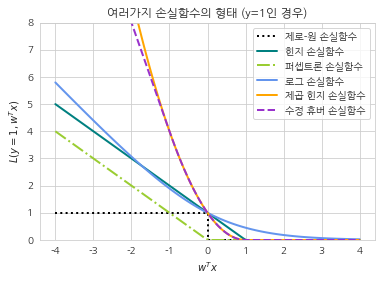

In [12]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k', lw=2, ls=":", label="제로-원 손실함수")
plt.plot(xx, np.where(xx < 1, 1 -xx, 0), color='teal', lw=2, ls="-", label="힌지 손실함수")  # xx < 1보다 작으면 1, 음수이면 0
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=2, ls="-.", label="퍼셉트론 손실함수") # 0보다 작은 값들만 플로팅하고 나머지는 0인데 음수값들을 다시 양수로 만들어 플로팅함
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=2, label="로그 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=2, label="제곱 힌지 손실함수") # xx < 1이면 1-xx, 아니면 0
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=2, ls='--', label="수정 휴버 손실함수")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$w^Tx$")
plt.ylabel(r"$L(y=1, w^Tx)$")
plt.title("여러가지 손실함수의 형태 (y=1인 경우)")
plt.show()

## Scikit-Learn 의 SGD 구현

Scikit-Learn에서 제공하는 SGDClassifier 클래스는 Perceptron 클래스에의 입력 인수 이외에도 손실함수를 결정하는 loss 인수를 가진다. 

가능합 값은 hinge, perceptron, log, huber, modified_huber, squared_hinge 등이다. 보통 modified_huber를 사용한다.

In [13]:
from sklearn.linear_model import SGDClassifier

In [18]:
def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolors='k')
    plt.xlabel("꽃받침 길이")
    plt.ylabel("꽃받침 폭")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.grid(False)
    plt.show()

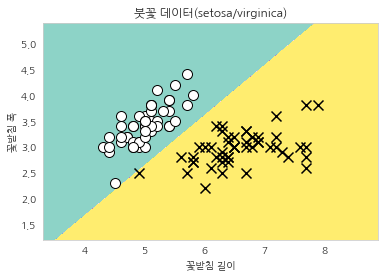

In [19]:
plot_sgd(400)

In [20]:
from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

In [21]:
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

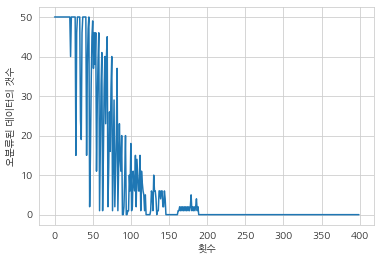

In [22]:
n = 400
loss = np.zeros(n)
model = SGDClassifier(loss="modified_huber", shuffle=False)
for i in range(n):  # 400번 반복했을 때 각 반복되는 횟수별로 잘못 분류되는 데이터 갯수 구하기
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
plt.plot(loss)
plt.xlabel("횟수")
plt.ylabel("오분류된 데이터의 갯수")
plt.show()

190번 정도에서 오분류된 데이터수가 0에 도달하는데 이는 Perceptrona 모형보다 더 빨리 0에 도달하고 있다. 즉, 반복 횟수를 줄이고 있기 때문에 성능이 더 좋다고 할 수 있다. 